In [1]:
# initial imports
import pandas as pd
import numpy as np
from pathlib import Path
import panel as pn
from panel.interact import interact
import plotly.express as px
pn.extension("plotly")
import os
from MCForecastTools import MCSimulation
import json
import requests 

In [2]:
def fetch_daily_data(symbol):
    pair_split = symbol.split('/')
    symbol = pair_split[0] +'-' + pair_split[1]
    #print(symbol)
    url = f'https://api.pro.coinbase.com/products/{symbol}/candles?granularity=86400'
    response = requests.get(url)
    #print(response.status_code)
    if response.status_code ==200:
        data = pd.DataFrame(json.loads(response.text), columns=['unix','low','high','open','close','volume'])
        data['date']=pd.to_datetime(data['unix'],unit='s')
        data['vol_fiat']= data['volume']*data['close']
        
        if data is None:
            print("Did not return any data from coinbase for this symbol")
        else:
            data.to_csv(f'Coinbase_{pair_split[0]+ pair_split[1]}_dailydata.csv', index=False)
        
    else: 
        print("Did not receive Ok response from Coinbase API")
            
    return data       
            
    #if __name__ == "__main__":
        #pair= "BTC/USD"
        #fetch_daily_data(symbol=pair)

In [3]:
fetch_daily_data('BTC/USD')

,unix,low,high,open,close,volume,date,vol_fiat
0,1632787200,41953.96,42637.51,42166.31,42527.71,815.229740,2021-09-28,3.466985e+07
1,1632700800,42111.00,44366.96,43172.17,42171.76,10094.770998,2021-09-27,4.257143e+08
2,1632614400,40803.00,43937.00,42705.51,43178.02,9971.645452,2021-09-26,4.305559e+08
3,1632528000,41675.00,42998.76,42848.44,42705.51,7383.323903,2021-09-25,3.153086e+08
4,1632441600,40683.29,45200.00,44896.55,42848.92,22451.577115,2021-09-24,9.620258e+08
...,...,...,...,...,...,...,...,...
295,1607299200,18901.00,19432.57,19375.60,19177.71,8977.451663,2020-12-07,1.721670e+08
296,1607212800,18878.00,19430.25,19158.96,19375.60,6665.281895,2020-12-06,1.291438e+08
297,1607126400,18501.00,19189.98,18658.09,19158.96,7082.222303,2020-12-05,1.356880e+08
298,1607040000,18576.05,19546.46,19446.43,18658.10,16382.877392,2020-12-04,3.056734e+08


In [4]:
btc_df = fetch_daily_data('BTC/USD')
btc_df.head()

,unix,low,high,open,close,volume,date,vol_fiat
0,1632787200,41953.96,42637.51,42166.31,42527.71,815.229740,2021-09-28,3.466985e+07
1,1632700800,42111.00,44366.96,43172.17,42171.76,10094.770998,2021-09-27,4.257143e+08
2,1632614400,40803.00,43937.00,42705.51,43178.02,9971.645452,2021-09-26,4.305559e+08
3,1632528000,41675.00,42998.76,42848.44,42705.51,7383.323903,2021-09-25,3.153086e+08
4,1632441600,40683.29,45200.00,44896.55,42848.92,22451.577115,2021-09-24,9.620258e+08


In [5]:
# Drop unnecessary columns

btc_df.drop(columns=['volume', 'open', 'high', 'low','vol_fiat','unix'], inplace=True)
btc_df.head()

,close,date
0,42527.71,2021-09-28
1,42171.76,2021-09-27
2,43178.02,2021-09-26
3,42705.51,2021-09-25
4,42848.92,2021-09-24


In [6]:
#Set Column as date index 
btc_plot = btc_df.set_index('date')

In [7]:
btc_plot.head()

,close
date,
2021-09-28,42527.71
2021-09-27,42171.76
2021-09-26,43178.02
2021-09-25,42705.51
2021-09-24,42848.92


In [8]:
btc_plot.index = pd.to_datetime(btc_plot.index)
btc_plot.columns = pd.MultiIndex.from_tuples([('BTC','close')])

In [9]:
btc_plot.sort_index(inplace=True)

In [10]:
#Parse dates for 1 year historical price of BTC
btc_plot_1year = btc_plot.loc['2020-09-21':'2021-09-21']
btc_plot_1year.head()

,BTC
,close
date,
2020-12-03,19448.64
2020-12-04,18658.10
2020-12-05,19158.96
2020-12-06,19375.60
2020-12-07,19177.71


In [75]:
#Parse dates for 3 year historical price of BTC 
btc_plot_3year= btc_plot.loc['2018-09-21':'2021-09-21']
btc_plot_3year.head()

,BTC
,close
date,
2020-11-30,42619.66
2020-12-01,42848.92
2020-12-02,44897.59
2020-12-03,43575.10
2020-12-04,40719.60


<AxesSubplot:xlabel='date'>

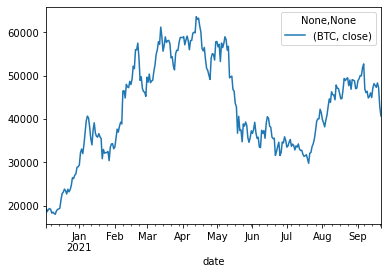

In [11]:
#Plot 1 year price of BTC
btc_plot_1year.plot()

In [12]:
#Plot 3 year price of BTC
btc_plot_3year.plot()

NameError: name 'btc_plot_3year' is not defined

In [13]:
fetch_daily_data('ETH/USD')

,unix,low,high,open,close,volume,date,vol_fiat
0,1632787200,2896.00,2956.39,2926.27,2951.72,20194.953384,2021-09-28,5.960985e+07
1,1632700800,2925.00,3168.03,3059.92,2925.27,172472.297858,2021-09-27,5.045280e+08
2,1632614400,2741.34,3117.48,2923.91,3060.71,168746.481423,2021-09-26,5.164840e+08
3,1632528000,2800.01,2968.85,2930.59,2924.01,145561.524442,2021-09-25,4.256234e+08
4,1632441600,2735.00,3160.48,3154.42,2930.61,365024.832046,2021-09-24,1.069745e+09
...,...,...,...,...,...,...,...,...
295,1607299200,584.54,603.40,601.97,591.47,79196.585403,2020-12-07,4.684240e+07
296,1607212800,583.31,607.46,597.29,601.95,101652.726703,2020-12-06,6.118986e+07
297,1607126400,561.15,597.88,567.76,597.29,95956.771361,2020-12-05,5.731402e+07
298,1607040000,566.00,620.56,616.46,567.60,195480.706292,2020-12-04,1.109548e+08


In [14]:
eth_df = fetch_daily_data('ETH/USD')
eth_df.head()

,unix,low,high,open,close,volume,date,vol_fiat
0,1632787200,2896.00,2956.39,2926.27,2951.72,20194.953384,2021-09-28,5.960985e+07
1,1632700800,2925.00,3168.03,3059.92,2925.27,172472.297858,2021-09-27,5.045280e+08
2,1632614400,2741.34,3117.48,2923.91,3060.71,168746.481423,2021-09-26,5.164840e+08
3,1632528000,2800.01,2968.85,2930.59,2924.01,145561.524442,2021-09-25,4.256234e+08
4,1632441600,2735.00,3160.48,3154.42,2930.61,365024.832046,2021-09-24,1.069745e+09


In [15]:
eth_df.drop(columns=['volume', 'open', 'high', 'low','vol_fiat','unix'], inplace=True)
eth_df.head()

,close,date
0,2951.72,2021-09-28
1,2925.27,2021-09-27
2,3060.71,2021-09-26
3,2924.01,2021-09-25
4,2930.61,2021-09-24


In [16]:
eth_plot = eth_df.set_index('date')

In [17]:
eth_plot.head()

,close
date,
2021-09-28,2951.72
2021-09-27,2925.27
2021-09-26,3060.71
2021-09-25,2924.01
2021-09-24,2930.61


In [18]:
eth_plot.columns

Index(['close'], dtype='object')

In [19]:
eth_plot.index = pd.to_datetime(eth_plot.index)
eth_plot.columns = pd.MultiIndex.from_tuples([('ETH','close')])

In [20]:
eth_plot.sort_index(inplace=True)

In [21]:
eth_plot.head()

,ETH
,close
date,
2020-12-03,616.65
2020-12-04,567.60
2020-12-05,597.29
2020-12-06,601.95
2020-12-07,591.47


In [22]:
# Converting the index as date
eth_plot.index = pd.to_datetime(eth_plot.index)

In [23]:
#Parse dates for 1 year historical price of ETH
eth_plot_1year = eth_plot.loc['2020-09-21':'2021-09-21']
eth_plot_1year.head()

,ETH
,close
date,
2020-12-03,616.65
2020-12-04,567.60
2020-12-05,597.29
2020-12-06,601.95
2020-12-07,591.47


In [24]:
#Parse dates for 3 year historical price of BTC 
eth_plot_3year = eth_plot.loc['2018-09-21':'2021-09-21']
eth_plot_3year.head()

,ETH
,close
date,
2020-12-03,616.65
2020-12-04,567.60
2020-12-05,597.29
2020-12-06,601.95
2020-12-07,591.47


<AxesSubplot:xlabel='date'>

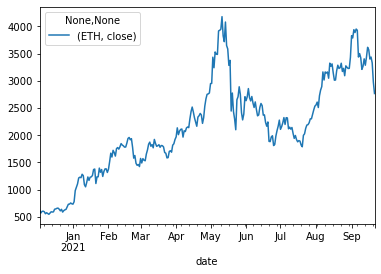

In [25]:
#Plot 1 year price of ETH
eth_plot_1year.plot()

<AxesSubplot:xlabel='date'>

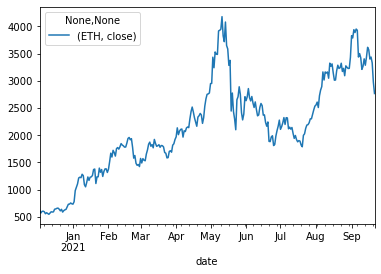

In [26]:
#Plot 3 year price of ETH
eth_plot_3year.plot()

In [27]:
# Set number of simulations
num_sims = 1000
# Configure a Monte Carlo simulation to forecast five years cumulative returns
ETH_MC = MCSimulation(
    portfolio_data = eth_plot,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*5
)
# Print the simulation input data
ETH_MC.portfolio_data.head()


ETH             
             close daily_return
date                           
2020-12-03  616.65          NaN
2020-12-04  567.60    -0.079543
2020-12-05  597.29     0.052308
2020-12-06  601.95     0.007802
2020-12-07  591.47    -0.017410

In [28]:
ETH_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.026512,1.014488,1.039031,1.007738,0.998224,1.042757,1.000012,0.997660,1.090044,1.020436,...,0.978869,0.974287,0.972839,0.981793,1.030416,1.061554,1.021985,1.074750,1.063240,1.035357
2,0.964307,1.128566,1.074857,1.053250,0.996093,1.070689,1.014589,0.977149,1.091844,1.073640,...,0.918521,0.913425,0.909396,1.022657,1.099954,1.146883,1.112965,1.052584,0.985449,1.203325
3,1.051931,1.135824,1.046730,1.069601,1.009809,0.977972,1.058892,0.999926,1.044557,1.115873,...,0.973490,0.834195,0.847500,0.978140,1.088472,1.018636,1.041373,1.029761,0.956883,1.339134
4,0.996226,1.106612,0.997409,0.982606,1.175345,0.891312,1.081316,0.938099,0.974158,1.226844,...,0.964554,0.894248,0.779577,0.955511,1.126779,1.098716,0.975785,1.118418,1.000602,1.381621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2100.542920,405.209333,977.231704,6919.838421,1943.426969,734.025682,25.927225,3163.773168,1370.277854,4246.587980,...,1156.167424,5484.762564,85.370618,21.153247,4677.711482,76.101692,1361.676647,54.751722,143.300663,7379.579970
1257,1990.973254,378.023983,1011.130872,6794.193080,2179.900203,797.416639,27.082454,3314.519204,1287.023174,4474.207057,...,1113.344737,5463.315843,89.341451,21.109301,4781.611272,83.063095,1437.073319,53.050107,160.753140,5536.584089
1258,1901.136780,385.563644,1002.048290,6327.840863,2177.896512,804.261448,28.078754,3427.599542,1304.750819,4027.405964,...,1075.626226,5750.578176,89.306003,22.160373,4644.741530,90.259496,1316.777866,49.943726,159.761876,5414.881327
1259,1941.008981,373.320815,1012.003282,6953.303148,1941.741548,810.291607,28.826187,3454.705118,1272.194331,3841.262598,...,1088.870552,5511.013535,80.912310,21.346020,4535.548071,86.503129,1323.151915,43.455874,136.945755,5225.999945


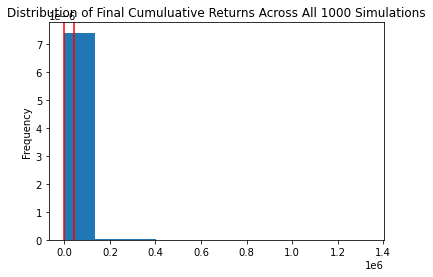

In [29]:
# Plot probability distribution and confidence intervals
eth_dist_plot = ETH_MC.plot_distribution()

In [30]:
# Fetch summary statistics from the Monte Carlo simulation results
ETH_STATS = ETH_MC.summarize_cumulative_return()

# Print summary statistics
print(ETH_STATS)

count           1.000000e+03
mean            7.779220e+03
std             5.136660e+04
min             4.299521e-01
25%             1.770749e+02
50%             7.805263e+02
75%             3.264749e+03
max             1.335994e+06
95% CI Lower    1.239158e+01
95% CI Upper    4.158107e+04
Name: 1260, dtype: float64


In [31]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
ETH_ci_lower = round(ETH_STATS[8]*15000,2)
ETH_ci_upper = round(ETH_STATS[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ETH_ci_lower} and ${ETH_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $185873.71 and $623715991.94.


In [33]:
# Set number of simulations
num_sims = 1000
# Configure a Monte Carlo simulation to forecast five years cumulative returns
BTC_MC = MCSimulation(
    portfolio_data = btc_plot,
    weights = [1],
    num_simulation = 1000,
    num_trading_days = 252*5
)
# Print the simulation input data
BTC_MC.portfolio_data.head()

BTC             
               close daily_return
date                             
2020-12-03  19448.64          NaN
2020-12-04  18658.10    -0.040648
2020-12-05  19158.96     0.026844
2020-12-06  19375.60     0.011308
2020-12-07  19177.71    -0.010213

In [35]:
BTC_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.036369,0.991616,0.922860,0.967335,1.012678,0.918306,1.064559,0.920508,1.094634,0.915409,...,1.058033,0.933043,1.078140,1.000333,1.054356,1.010460,0.971742,1.076039,1.048288,1.001604
2,1.080677,1.043284,0.961693,1.031155,0.963546,0.944953,0.989917,0.934960,1.139130,0.919137,...,1.109127,0.928891,1.115844,0.969243,1.082550,0.979264,0.965995,1.120933,1.067482,1.069479
3,1.059911,1.012150,0.956795,1.029490,0.949239,0.947268,1.028931,0.885228,1.151247,0.904869,...,1.082210,0.913458,1.100519,0.983191,1.064294,0.939351,0.900494,1.089805,1.105967,1.052845
4,1.030356,1.001183,0.976735,0.987017,0.851961,0.952140,1.048539,0.877229,1.140593,0.905052,...,1.088594,0.851739,1.144756,1.005125,1.078208,0.883188,0.905865,1.051927,1.054982,1.006143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,3.566002,258.217286,79.777491,9.627197,15.150972,81.335087,44.024218,2.625517,60.514212,34.833187,...,30.195108,31.164987,85.291680,6.208439,216.737327,20.514269,16.868436,719.600910,322.515468,13.506785
1257,3.699625,267.254423,77.415558,10.451991,15.618090,81.042575,44.890786,2.607067,62.939170,34.980188,...,29.827054,31.537519,86.252167,6.526357,228.322292,21.707966,17.433228,692.339816,331.283735,13.149311
1258,3.727814,258.072889,81.588754,11.305590,14.525736,84.287990,47.383356,2.687174,64.850978,35.305727,...,27.071522,30.641224,90.019995,6.492198,225.816279,22.180572,18.133626,703.304735,316.316370,13.165699
1259,3.602633,270.214076,77.396234,11.321477,14.844209,87.501142,46.458961,2.716982,64.776017,36.245454,...,26.048552,33.692766,97.002138,6.185282,236.259890,23.216267,18.185662,702.645704,314.429805,13.006999


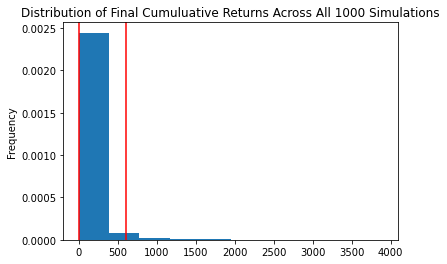

In [36]:
# Plot probability distribution and confidence intervals
btc_dist_plot = BTC_MC.plot_distribution()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

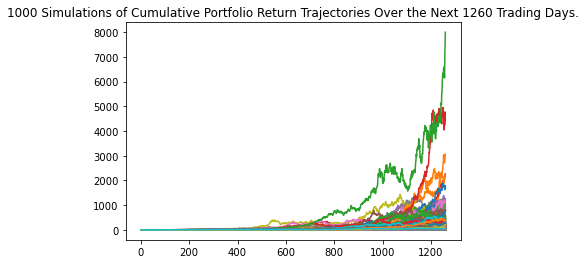

In [34]:
# Plot simulation outcomesBTC
line_plot_BTC = BTC_MC.plot_simulation()

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
BTC_STATS = BTC_MC.summarize_cumulative_return()

# Print summary statistics
print(BTC_STATS)

count           1000.000000
mean              93.566124
std              229.292438
min                0.328327
25%                9.451439
50%               29.386877
75%               81.715935
max             3899.992509
95% CI Lower       1.208112
95% CI Upper     606.358236
Name: 1260, dtype: float64


In [38]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
BTC_ci_lower = round(BTC_STATS[8]*15000,2)
BTC_ci_upper = round(BTC_STATS[9]*15000,2)

# Print results
print(f"There is a 95% chance that an initial investment of $15,000 in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${BTC_ci_lower} and ${BTC_ci_upper}.")

There is a 95% chance that an initial investment of $15,000 in the portfolio over the next 5 years will end within in the range of $18121.69 and $9095373.53.
